In [50]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from subprocess import call

In [51]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [54]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [55]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [56]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


### Dealing with missing data

Since the dataset was from the previous task  in 'T15 Exploratory-Data-Analysis' and found in 'Exploratory Data Analysis.ipynb' I will be doing the same thing for the missing data as much hasn't changed. To find what I have done and why I came to that conclusion [link to notebook](https://github.com/SalAbdiaziz01/Task-15---Exploratory-Data-Analysis) (*Can be found in cell 13,14*)


In [57]:
# Using pandas to change the age to numerical values and non-numeric to NaN
titanic_df['Age'] = pd.to_numeric(titanic_df['Age'], errors='coerce')

# Filling in all the missing data with the method median() of for the 'Age' column and changing 'object' to 'int64'
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Age'] = titanic_df['Age'].astype('int64')

# Dropping columns that isn't used for the Dicision Tree Classifer
titanic_df = titanic_df.drop(columns=['Name','Ticket','Fare'])

# Encoding categorical variable to values 
encoding_columns = ['Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
for columns in encoding_columns:
	titanic_df[columns] = titanic_df[columns].map({
    	False:0,
    	True:1
	})

# Checking updated dataset
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Age          891 non-null    int64
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
 6   Sex_female   891 non-null    int64
 7   Sex_male     891 non-null    int64
 8   Embarked_C   891 non-null    int64
 9   Embarked_Q   891 non-null    int64
 10  Embarked_S   891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB


C:\Users\Salman\AppData\Local\Temp\ipykernel_28880\3348321744.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,0,1,0,0,1
1,2,1,1,38,1,0,1,0,1,0,0
2,3,1,3,26,0,0,1,0,0,0,1
3,4,1,1,35,1,0,1,0,0,0,1
4,5,0,3,35,0,0,0,1,0,0,1


In [58]:
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']
X.shape


(891, 10)

Train Test Split

In [59]:
rseed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rseed)

### Decision Tree classifier
Check train and test accuracy

In [61]:
# Create Decision Tree classifer object
# training a model without pruning

# Create Decision Tree classifier object
unpruned = DecisionTreeClassifier(random_state=rseed)

# Train the model
unpruned.fit(X_train, y_train)

# Predict the results
y_train_pred = unpruned.predict(X_train)
y_test_pred = unpruned.predict(X_test)

#Model Accuracy and Confusion Matrix, how often is the classifier correct
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy without pruning: {accuracy_score(y_test, y_test_pred)}')
print("At depth:", unpruned.tree_.max_depth)
# print("Performance without pruning:", unpruned.score(X_test, y_test))


Training Accuracy: 1.0
Testing Accuracy without pruning: 0.7052238805970149
At depth: 17


Training Accuracy: 1.0
Testing Accuracy: 0.7052238805970149


Text(0.5, 1.0, 'Test Confusion Matrix')

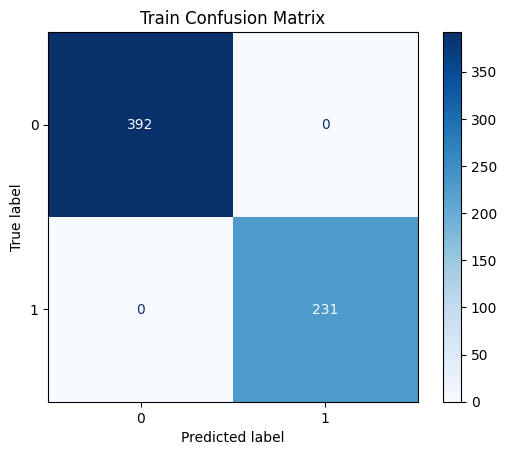

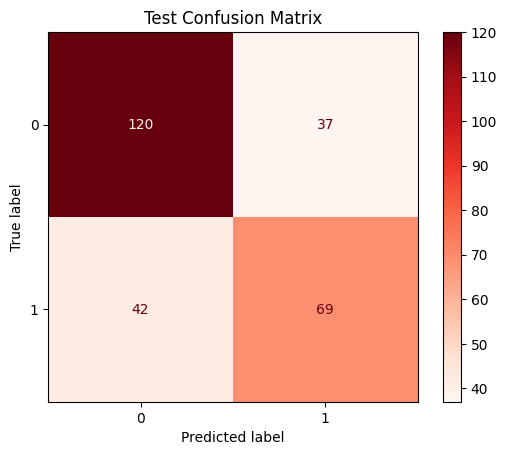

In [66]:
#Model Accuracy and Confusion Matrix, how often is the classifier correct
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_test_pred)}')

# Creating a confusion matrix with the training data 
cm = confusion_matrix(y_train, y_train_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Train Confusion Matrix')

# Creating a confusion matrix with the testing data 
cm = confusion_matrix(y_test, y_test_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Reds')
plt.title('Test Confusion Matrix')

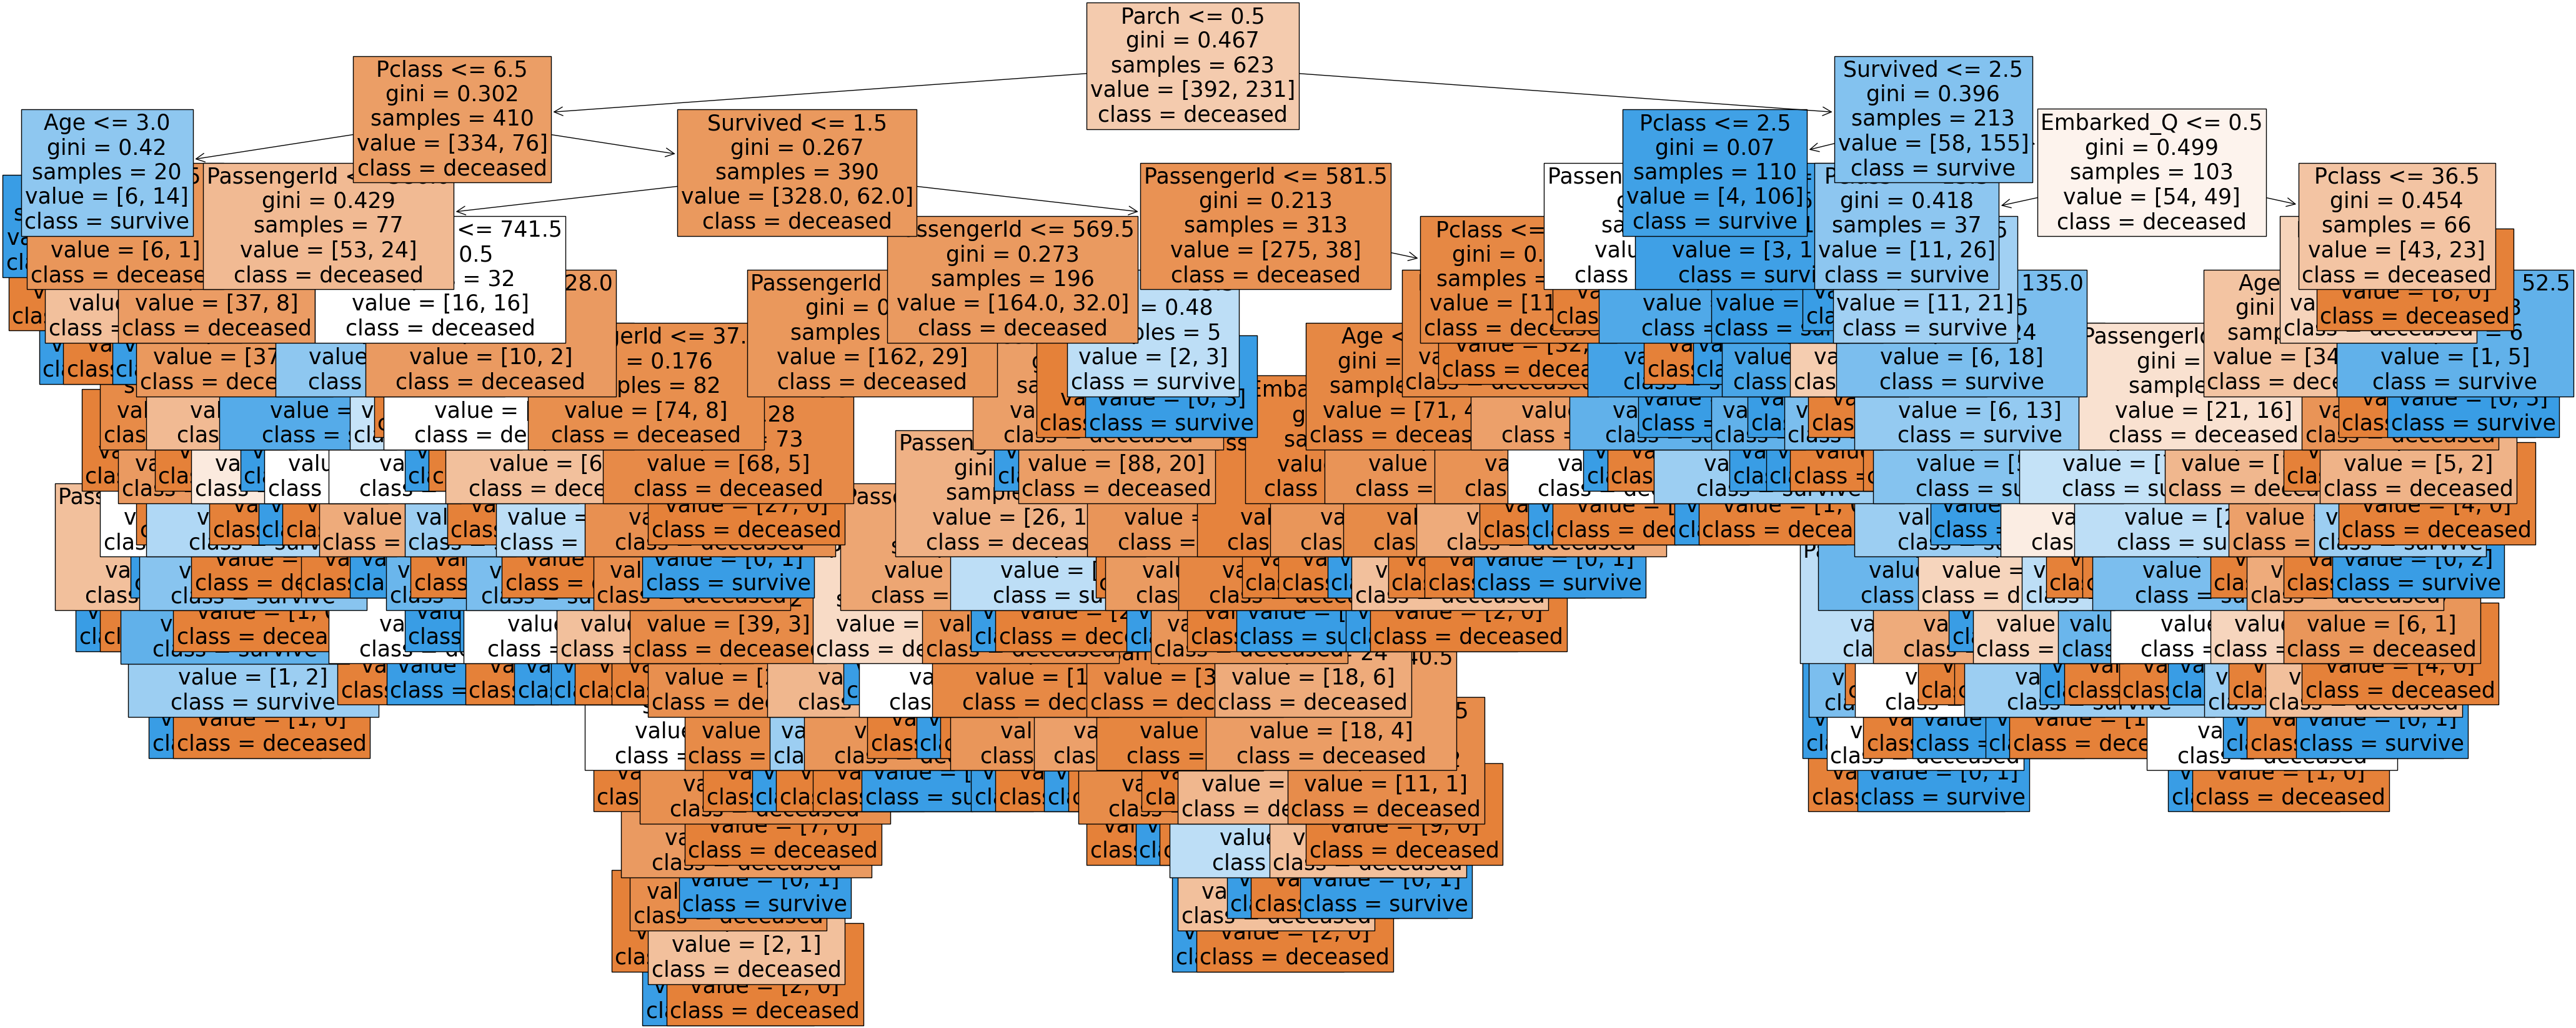

In [67]:
plt.figure(figsize=(50,20))
features = titanic_df.columns
classes = ['deceased','survive']

tree.plot_tree(
    unpruned,
    feature_names=features,
    class_names=classes,
    filled=True,
    fontsize=25
)

plt.show()

Text(0, 0.5, 'Accuracy')

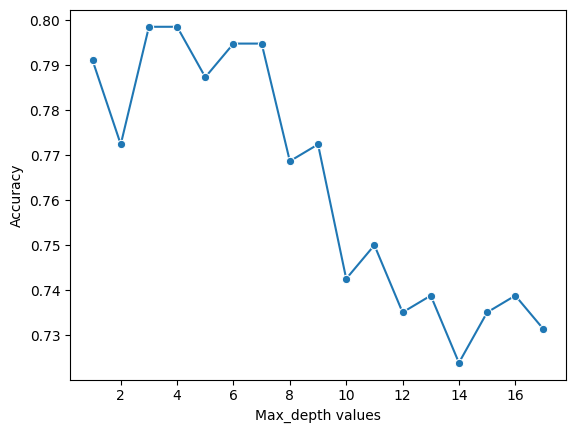

In [68]:
# looking at effect of max_depth pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=1)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

sns.lineplot(x=pruned_depths,y=pruned_scores, marker="o")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")

In [71]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

#pruned = DecisionTreeClassifier(max_depth=best_depth,random_state=r)
pruned = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth,random_state=rseed,min_samples_leaf=2)

# Train Decision Tree Classifer
pruned.fit(X_train,y_train)
#pruned.fit(X, y)

#Predict the response for test dataset
y_test_pred = pruned.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",accuracy_score(y_test, y_test_pred))

Best performance reached at depth of: 3
Training Accuracy: 1.0
Testing Accuracy: 0.7985074626865671


Training Accuracy: 1.0
Testing Accuracy: 0.7985074626865671


Text(0.5, 1.0, 'Test Confusion Matrix')

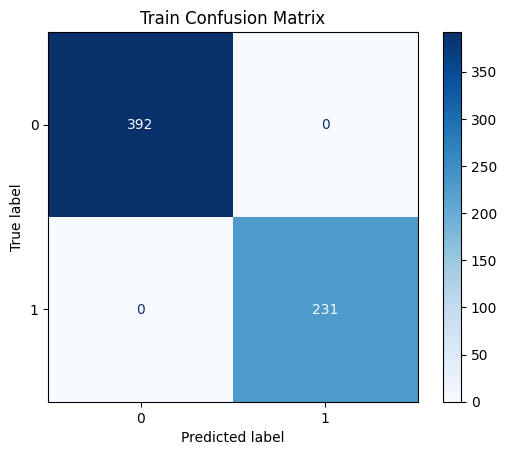

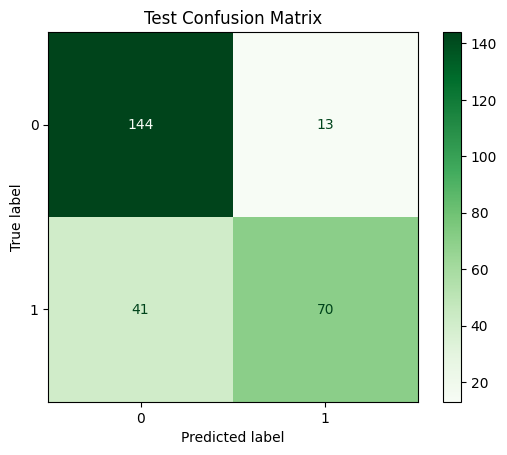

In [77]:
#Model Accuracy and Confusion Matrix, how often is the classifier correct
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_test_pred)}')

cm = confusion_matrix(y_train, y_train_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Train Confusion Matrix')

cm = confusion_matrix(y_test, y_test_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Greens')
plt.title('Test Confusion Matrix')

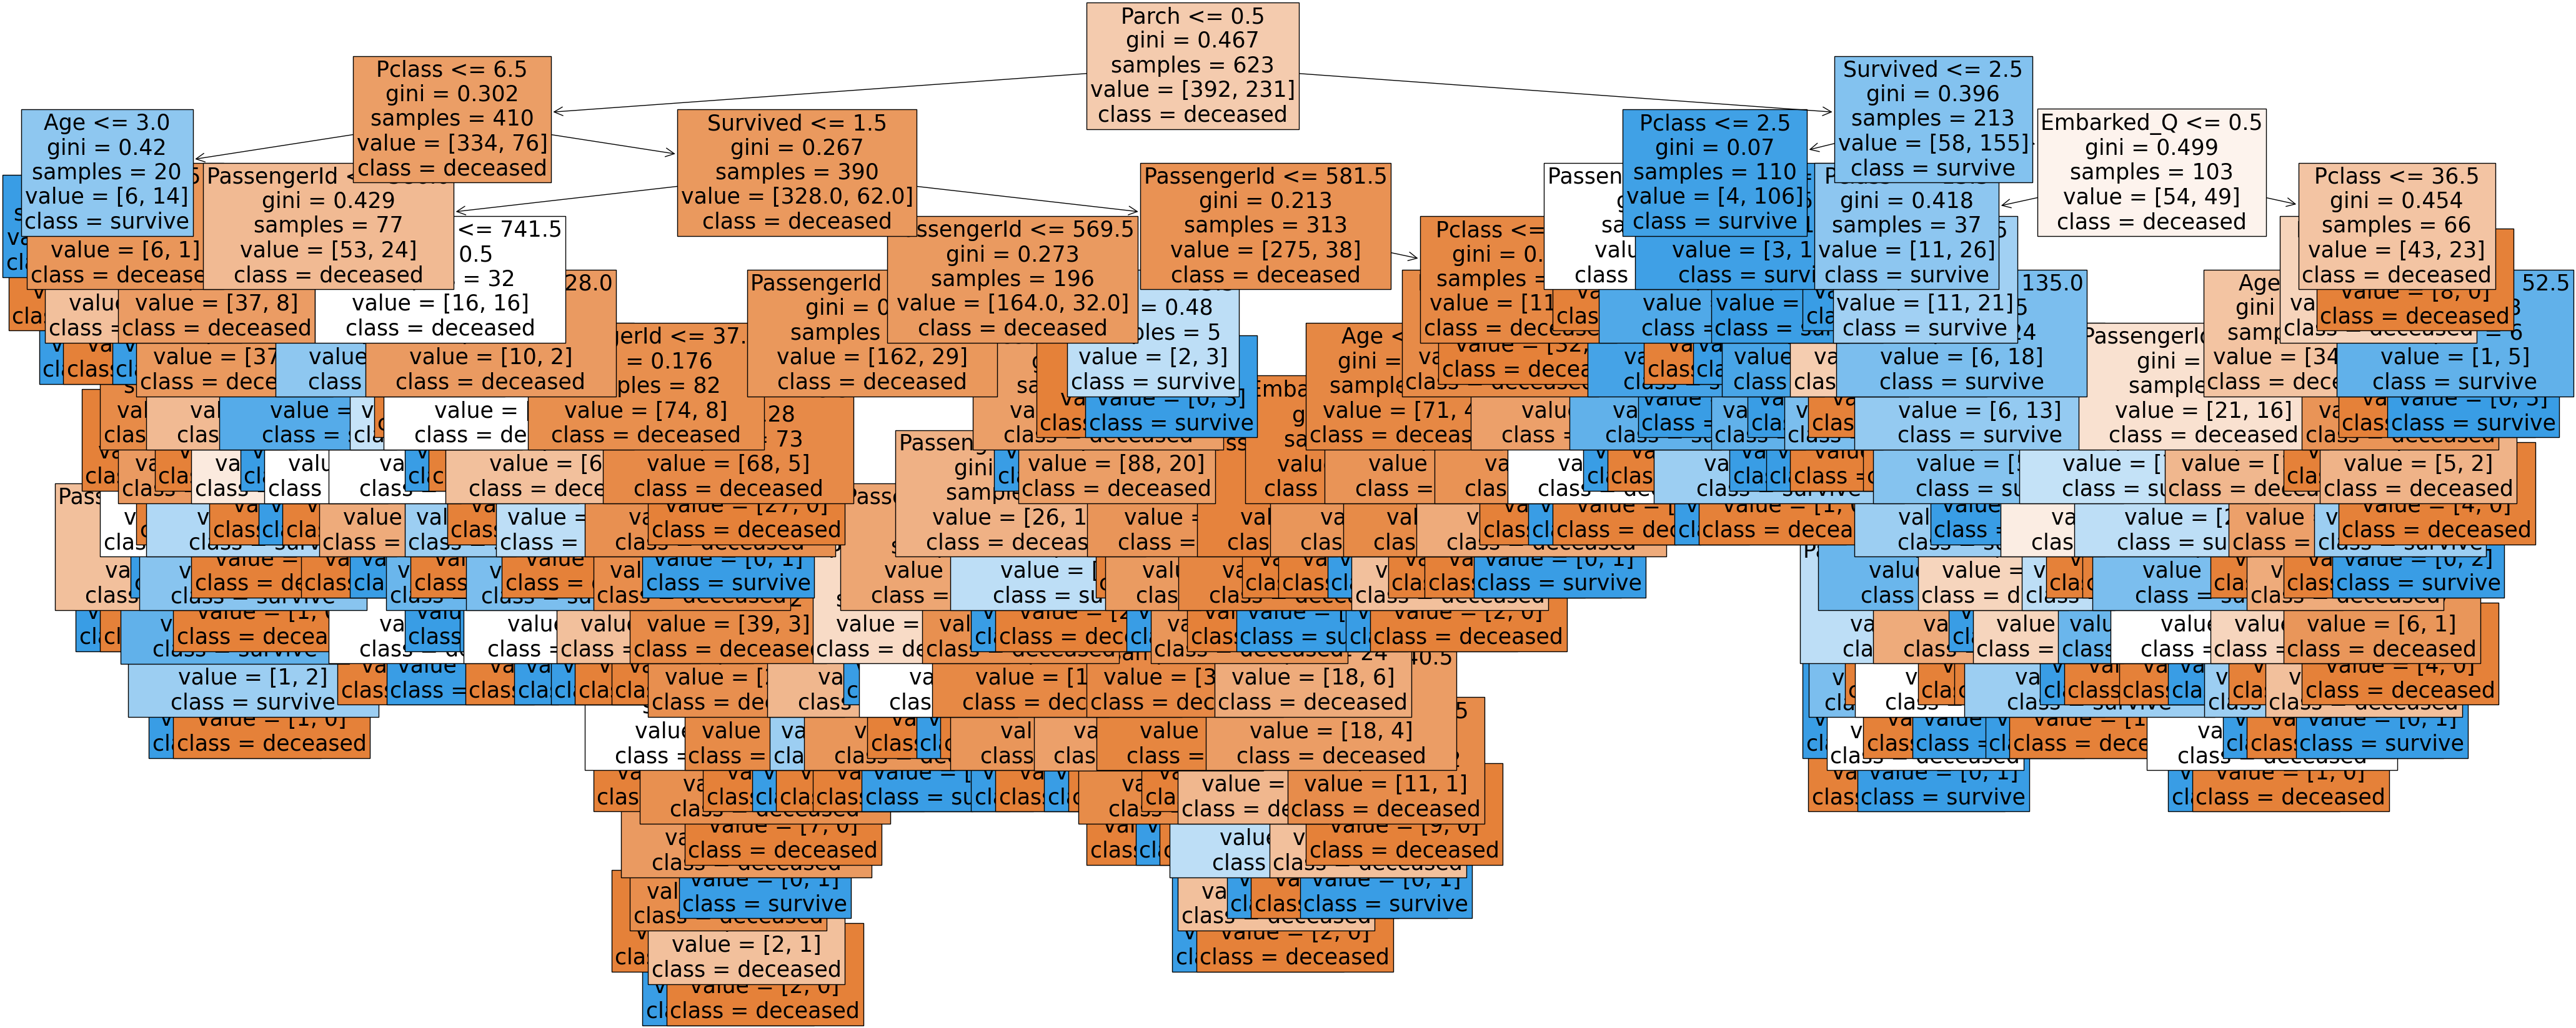

In [78]:
plt.figure(figsize=(50,20))
features = titanic_df.columns
classes = ['deceased','survive']

tree.plot_tree(
    unpruned,
    feature_names=features,
    class_names=classes,
    filled=True,
    fontsize=25
)

plt.show()